<h1> Project: Credit Card Approval Analysis </h1>
<h2> Names: Jingzhi Yang</h2>
<h3><a href="https://yship1002.github.io">https://yship1002.github.io</a></h3>

<li><a href="#Project Goal">Project Goal</a></li>
<li><a href="#Background">Background</a></li>
<li><a href="#Dataset">Dataset</a></li>
<li><a href="#Methodology">Methodology</a></li>
<ol>Exploratory Data Analysis
        <li><a href="#Dataset 1: Credit Card Data from book 'Econometric Analysis'">Dataset 1: Credit Card Data from book "Econometric Analysis"</a></li>
        <li><a href="#Dataset 2: Cleaned Credit approval dataset from UCI">Dataset 2: Cleaned Credit approval dataset from UCI</a></li>
</ol>
<ol>Building Prediction Model
<li><a href="#KNN">KNN</a></li>
<li><a href="#Logistic Regression">Logistic Regression</a></li>
</ol>
<li><a href="#Oaxaca-Blinder-Kitagawa Decomposition">Oaxaca-Blinder-Kitagawa Decomposition</a></li>


<a id="Project Goal"></a>
<h1 style="text-align:left">Project Goal</h1>
<p>In this project I will first build two seperate models to predict whether your credit card application will be approved.(1.KNN 2.Logistic Regression) Then I will be using Oaxaca-Blinder-Kitagawa decomposition, a regression analysis I learnt in my Economics of Discriminiation class to isolate and quantify discrimination in credit card application.</p>

<a id="Background"></a>
<h1>Background</h1>
<h2>Oaxaca-Blinder-Kitagawa Decomposition</h2>

<p>Oaxaca-Blinder-Kitagawa decomposition is widely used by quantitative social scientists to quantify discrimination between two groups of people. The basic idea is to control for as many independent variables as possible to make two groups 'identical' and see if there are still unexplained difference in dependent variables. This method was first proposed to study the gender wage gap. I will use this example to illustrate the method.</p>

<p>Let us say that wage (W) is dependent on education (ED), experience (EXP) and whether the worker is unionized (UNION). We can run two linear regression models to estimate wage for both men and women</p>
<p>$W_m=a_m+b_m{ED}_m+c_mEXP_m+d_mUNION_m$</p>
<p>$W_f=a_f+b_f{ED}_f+c_fEXP_f+d_fUNION_f$</p>
<p>subscript m denotes male and f denotes female</p>
<p>If we subsitute average $\overline{ED}_m, \overline{EXP}_m, \overline{UNION}_m,\overline{ED}_f, \overline{EXP}_f, \overline{UNION}_f$ for both male and female group then the raw gender wage gap $W_m-W_f$ is the following:</p>

<p>$W_m-W_f=a_m+b_m\overline{ED}_m+c_m\overline{EXP}_m+d_m\overline{UNION}_m-$ <br>
$\hspace{3cm}(a_f+b_f\overline{ED}_f+c_f\overline{EXP}_f+d_f\overline{UNION}_f)$</p>

<p>To isolate explained and unexplained gender wage gap we do a simple math trick: <br>
add and subtract $b_m\overline{ED}_f,c_m\overline{EXP}_f, f_m\overline{UNION}_f$ on the right hand side of equation</p>

<p>$W_m-W_f=b_m(\overline{ED}_m-\overline{ED}_f)+c_m(\overline{EXP}_m-\overline{EXP}_f)+d_m(\overline{UNION}_m-\overline{UNION}_f)+$ <br>
$\hspace{3cm}a_m-a_f+(b_m-b_f)\overline{ED}_f+(c_m-c_f)\overline{EXP}_f+(d_m-d_f)\overline{UNION}_f$</p>
<p>The sum of first three terms on the right hand is the explained part of wage gap due to gender difference in education, experience and whether unionized and the sum of last four terms are the unexplained part of wage gap that might be discrimination</p>

<a id="Dataset"></a>
<h1 style="text-align:left">Datasets</h1>
<p>The following two datasets have all the necessary information I need in order to build prediction model and quantify discrimination in credit card application. I also provided descriptions of two datasets as well as how I am going to use them.</p>
<p>Dataset 1: <a href="https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?resource=download">Credit Card Data from book "Econometric Analysis"</a></p>
<p>This is a dataset attached to the book 'Econometric Analysis' by William Greene. I am using this dataset because it is very clean</p>
<p>Dataset 2: <a href="https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data">Cleaned Credit approval dataset from UCI</a></p>
<p>This Kaggle dataset is originally from UCI machine learning repository. Kaggle User SAMUEL CORTINHAS have cleaned the <a href="https://archive.ics.uci.edu/ml/datasets/Credit+Approval?msclkid=200008bdc4a311ec9f500a3245a2bfb1">original UCI data</a> by filling missing values and inferring feature names from the raw dataset. This step is necessary in order to get more context and make this dataset easier to use. I will be using this cleaned version as a starting point of my analysis.</p>

<a id="Methodology"></a>
<h1>Methodology</h1>
<p>Each dataset is very self-contained. Therefore for each dataset, I will first train two models to predict the outcome of the credit card application and compare the accuracy of two prediction models.(1.KNN 2.Logistic Regression) Then I will use Oaxaca-Blinder-Kitagawa decomposition to isolate and quantify discrimination in credit card application</p>

<a id="Collaboration Plan"></a>
<h1 style="text-align:left">Collaboration Plan</h1>
<p>There is no collaboration plan because Jingzhi Yang will be the only one doing this project</p>

<h1 style="text-align:left">Exploratory Data Analysis</h1>
<a id="Dataset 1: Credit Card Data from book 'Econometric Analysis'"></a>
<h2 style="text-align:left">Dataset 1: Credit Card Data from book 'Econometric Analysis'</h2>
<p>The first step is to load the datasets.</p>

<p>First the income here is per 10000. We need to rescale it. Second although panda infers the data types correctly, we'd be better off to map 'card'column to 1 or 0 to make our model training easier.</p>

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from Oaxaca import Oaxaca
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
df_big=pd.read_csv("../data/Big_Data.csv")
df_big['income']=df_big['income']*10000
df_big['card']=df_big['card'].map({
    "yes":1,
    "no":0
})
display(df_big.head())
df_big.dtypes

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,45200.0,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,24200.0,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,45000.0,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,25400.0,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,97867.0,0.067051,546.503300,yes,no,2,64,1,5


card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

<h2>What is the income distribution of this dataset?</h2>

Text(0, 0.5, 'Frequency')

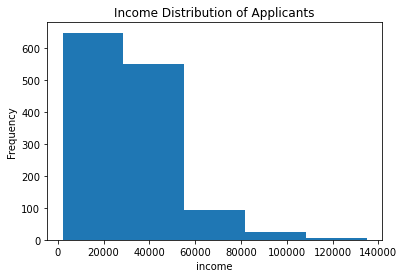

In [3]:
plt.hist(df_big['income'],bins=5)
plt.title("Income Distribution of Applicants")
plt.xlabel("income")
plt.ylabel("Frequency")

<h2>What is the age distribution of this dataset?</h2>
<p>It looks like most applicants in this dataset are in their age 30s,40s</p>

Text(0, 0.5, 'Frequency')

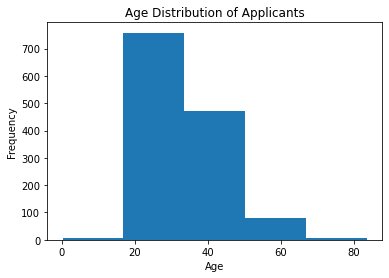

In [5]:
plt.hist(df_big['age'],bins=5)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Frequency")

<a id="Dataset 2: Cleaned Credit approval dataset from UCI"></a>
<h2 style="text-align:left">Dataset 2: Cleaned Credit approval dataset from UCI</h2>
<p>The first step is to load the datasets and check data types</p>

<p>It looks like panda infer the data types correctly.</p>

In [7]:
df_small=pd.read_csv("../data/Small_Data.csv")
display(df_small.head())
df_small.dtypes

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

<h2>What is the Job distribution of applicants?</h2>
<p>It looks like a lot of people work in energy sector</p>

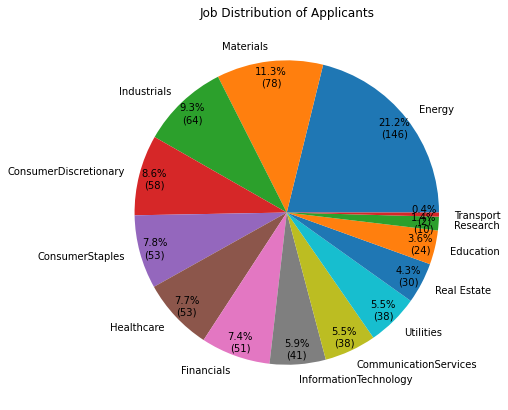

In [8]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
plt.figure(figsize =(10, 7))
plt.title("Job Distribution of Applicants")
a=plt.pie(x=df_small['Industry'].value_counts(),
        labels=df_small['Industry'].value_counts().index,
        autopct=lambda pct: func(pct, df_small['Industry'].value_counts()),
         labeldistance=1.1,
         pctdistance=0.9,)

<h2>What is the Ethnicity distribution of applicants?</h2>

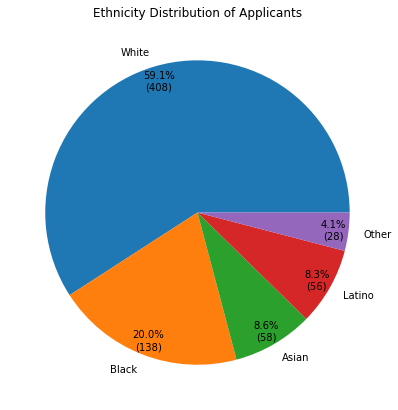

In [9]:
plt.figure(figsize =(10, 7))
plt.title("Ethnicity Distribution of Applicants")
a=plt.pie(x=df_small['Ethnicity'].value_counts(),
        labels=df_small['Ethnicity'].value_counts().index,
        autopct=lambda pct: func(pct, df_small['Ethnicity'].value_counts()),
         labeldistance=1.1,
         pctdistance=0.9)

<h2>What is the Age distribution of applicants?</h2>
<p>It looks like a lot of people work in energy sector</p>

Text(0, 0.5, 'Frequency')

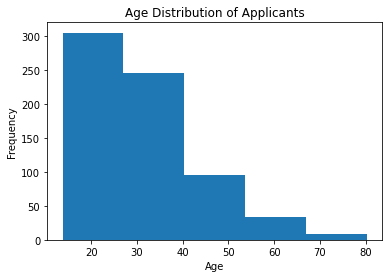

In [10]:
plt.hist(df_small['Age'],bins=5)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Frequency")

<a id="KNN"></a>
<h1>Building Prediction Model</h1>
<h2>Part1: k-Nearest Neighbors(KNN)</h2>

<p>Using KNN model to predict application result in Credit Card Data from book "Econometric Analysis" dataset. We will be using F1 score to find the best K value. It looks like K=8 is the best choice</p>

Text(0, 0.5, 'F1 Score')

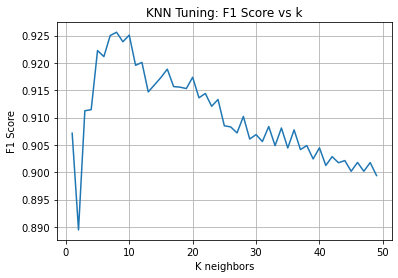

In [11]:
# Establish model and pipeline
k_list=list(range(1,50))
accuracyscore=[]
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    scaler=StandardScaler()
    vec = DictVectorizer(sparse=False)
    pipeline = Pipeline([
        ("vec",vec),
        ("scaler", scaler),
        ("model", model)
    ])
    features=['reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active']
    # define the training data

    X_train = df_big[features]
    y_train = df_big['card']

    X_train=X_train.to_dict(orient="records")


    accuracyscore.append(cross_validate(pipeline, X_train, y_train, cv=10,scoring="f1",return_train_score=True)['test_score'].mean())
plt.plot(k_list,accuracyscore)
plt.title("KNN Tuning: F1 Score vs k")
plt.grid()
plt.xlabel("K neighbors")
plt.ylabel("F1 Score")

<p>Using KNN model to predict application result in Cleaned Credit approval dataset from UCI. We will be using F1 score to find the best K value. It looks like K=6 is the best choice</p>

Text(0, 0.5, 'F1 Score')

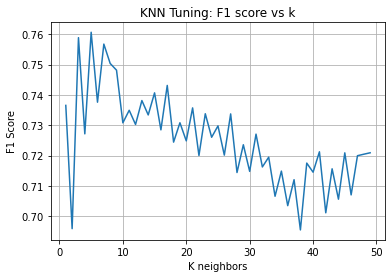

In [12]:
k_list=list(range(1,50))
accuracyscore=[]
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    scaler=StandardScaler()
    vec = DictVectorizer(sparse=False)
    pipeline = Pipeline([
        ("vec",vec),
        ("scaler", scaler),
        ("model", model)
    ])
    features=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'Citizen', 'Income']
    # define the training data
    X_train = df_small[features]
    y_train = df_small['Approved']
    X_train=X_train.to_dict(orient="records")
    
    accuracyscore.append(cross_validate(pipeline, X_train, y_train, cv=10,scoring="f1",return_train_score=True)['test_score'].mean())
plt.plot(k_list,accuracyscore)
plt.title("KNN Tuning: F1 score vs k")
plt.grid()
plt.xlabel("K neighbors")
plt.ylabel("F1 Score")

<a id="Logistic Regression"></a>
<h2>Part2: Logistic Regression</h2>

<p>Using Logistic Regression model to predict application result in Credit Card Data from book "Econometric Analysis" dataset.</p>

In [160]:
model = LogisticRegression(random_state=20)
scaler=StandardScaler()
vec = DictVectorizer(sparse=False)
pipeline = Pipeline([
    ("vec",vec),
    ("scaler", scaler),
    ("model", model)
])
features=['reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active']
# define the training data
X_train = df_big[features]
y_train = df_big['card']
X_train=X_train.to_dict(orient="records")

print("F1 Score: {}".format(cross_validate(pipeline, X_train, y_train, cv=10,scoring="f1",return_train_score=True)['test_score'].mean()))


F1 Score: 0.9692097128382839


<p>Using Logistic Regression model to predict application result in Cleaned Credit approval dataset from UCI.</p>

In [161]:
model = LogisticRegression(random_state=20)
scaler=StandardScaler()
vec = DictVectorizer(sparse=False)
pipeline = Pipeline([
    ("vec",vec),
    ("scaler", scaler),
    ("model", model)
])
features=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
   'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'Citizen', 'Income']
# define the training data
X_train = df_small[features]
y_train = df_small['Approved']
X_train=X_train.to_dict(orient="records")

print("F1 Score: {}".format(cross_validate(pipeline, X_train, y_train, cv=10,scoring="f1",return_train_score=True)['test_score'].mean()))


F1 Score: 0.8462137195118092


<p>Conclusion: for each dataset, controlling for the features used, logistic regression model outperforms KNN model</p>

<a id="Oaxaca-Blinder-Kitagawa Decomposition"></a>
<h1>Oaxaca-Blinder-Kitagawa Decomposition</h1>

<p>We will be using <a href="https://www.statsmodels.org/dev/generated/statsmodels.stats.oaxaca.OaxacaBlinder.html">statsmodel Oaxaca package</a> to perform analysis. If you forget what Oaxaca-Blinder-Kitagawa Decomposition is ( I know you didn't finish reading those boring math ) you can go to <a href="#Background">Background</a> to review.</p> It is important you understand what is explained and unexplained part of the gap.

<h2>Is there gender discrimination in credit card application?</h2>
<p>Controlling for 'Debt','Age',"Income",'Industry','Ethnicity',"Employed","Citizen","PriorDefault","Married" we found that 20% of the wage gap between men and women might be due to gender discrimination</p>

In [13]:
by="Gender"
endog="Approved"
#'Debt','Age',"Income",'Industry','Ethnicity',"Employed","Citizen","PriorDefault","Married"
features=['Debt','Age',"Income",'Industry','Ethnicity',"Employed","Citizen","PriorDefault","Married"]
df_numarray=pd.get_dummies(df_small[[endog,by]+features], drop_first=True).values
ox = Oaxaca(df_numarray, by=1, endo=0, debug=True)
unexplained,explained,gap=ox.two_fold(round_val=10)
print("Potential Discrimination: {}%".format(unexplained/gap*100))

These are the attempted split values: Float64Index([1.0, 0.0], dtype='float64')
Unexplained Effect: -0.0065471866
Explained Effect: -0.0247028134
Gap: -0.03125
Potential Discrimination: 20.95099712%


<h2>Is there racial discrimination on black folks in credit card application?</h2>
<p>Before we perform analysis we need to make a seperate variable to indicate ethnicity</p>
<p>Controlling for 'Debt','Age',"Income",'Industry',"Employed","Citizen","PriorDefault","Married" we found that 12% of the wage gap between black and non-black applicants might be due to racial discrimination</p>

In [22]:
df_small['is_black']=[1 if i=="Black" else 0 for i in df_small['Ethnicity']]
by="is_black"
endog="Approved"
#'Debt','Age',"Income",'Industry','Ethnicity',"Employed","Citizen","PriorDefault","Married"
features=['Debt','Age',"Income",'Industry',"Employed","Citizen","PriorDefault","Married"]
df_numarray=pd.get_dummies(df_small[[endog,by]+features], drop_first=True).values
ox = Oaxaca(df_numarray, by=1, endo=0, debug=True)
unexplained,explained,gap=ox.two_fold(round_val=10)
print("Potential Discrimination: {}%".format(unexplained/gap*100))

These are the attempted split values: Float64Index([0.0, 1.0], dtype='float64')
Unexplained Effect: -0.0295237873
Explained Effect: -0.2023602706
Gap: -0.231884058
Potential Discrimination: 12.732133271533483%
